In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Load Train Data
df_train = pd.read_csv('train.csv')
df_train

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


In [3]:
# Load Test Data
df_test = pd.read_csv('test.csv')
df_test

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes
125686,314219,Audi,Q7 55 Prestige,2019,29336,Gasoline,3.0 Liter Turbo,Automatic,White,Black,None reported,NaN
125687,314220,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
125688,314221,Audi,Q7 3.0T Premium,2012,112000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes


In [4]:
# Data Overview
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB


In [6]:
df_train.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [7]:
# Train and Test Data Missing Values
print(df_train.isnull().sum())
print(df_test.isnull().sum())

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64
id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64


In [8]:
df_train.isnull().sum() / len(df_train) * 100

id               0.000000
brand            0.000000
model            0.000000
model_year       0.000000
milage           0.000000
fuel_type        2.696080
engine           0.000000
transmission     0.000000
ext_col          0.000000
int_col          0.000000
accident         1.300568
clean_title     11.360876
price            0.000000
dtype: float64


Test Data Missing Values:

 id               0.000000
brand            0.000000
model            0.000000
model_year       0.000000
milage           0.000000
fuel_type        2.696080
engine           0.000000
transmission     0.000000
ext_col          0.000000
int_col          0.000000
accident         1.300568
clean_title     11.360876
price            0.000000
dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_21736\113102427.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


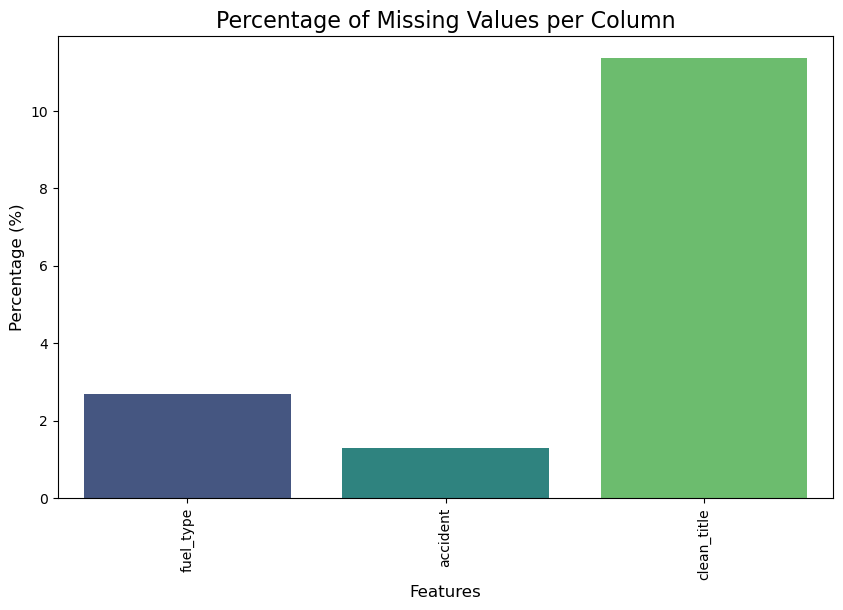

In [9]:
missing_values = df_train.isnull().sum()/df_train.shape[0] * 100
print("\nTest Data Missing Values:\n\n", missing_values)

# Filter only columns with missing values
missing_values = missing_values[missing_values > 0]

# Plotting the missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values per Column', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

In [10]:
# Duplicate Check
duplicates = df_train.duplicated()
print(df_train[duplicates])

Empty DataFrame
Columns: [id, brand, model, model_year, milage, fuel_type, engine, transmission, ext_col, int_col, accident, clean_title, price]
Index: []


In [11]:
df_train['clean_title'].fillna('No', inplace=True)
df_test['clean_title'].fillna('No', inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_21736\1497690139.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['clean_title'].fillna('No', inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_21736\1497690139.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [12]:
df_train['accident'].fillna('None reported', inplace=True)
df_train['fuel_type'].fillna('Electric', inplace=True)
df_test['accident'].fillna('None reported', inplace=True)
df_test['fuel_type'].fillna('Electric', inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_21736\3335672670.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['accident'].fillna('None reported', inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_21736\3335672670.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [13]:
df_train.isnull().sum() / len(df_train) * 100

id              0.0
brand           0.0
model           0.0
model_year      0.0
milage          0.0
fuel_type       0.0
engine          0.0
transmission    0.0
ext_col         0.0
int_col         0.0
accident        0.0
clean_title     0.0
price           0.0
dtype: float64

In [14]:
# Replace 'â€“' in the 'engine' column with the mode value for both train and test data
df_train['engine'].replace('â€“', df_train['engine'].mode()[0], inplace=True)
df_test['engine'].replace('â€“', df_test['engine'].mode()[0], inplace=True)

# Replace 'â€“' in the 'fuel_type' column with the mode value for both train and test data
df_train['fuel_type'].replace('â€“', df_train['fuel_type'].mode()[0], inplace=True)
df_test['fuel_type'].replace('â€“', df_test['fuel_type'].mode()[0], inplace=True)

# Replace 'â€“' in the 'transmission' column with the mode value for both train and test data
df_train['transmission'].replace('â€“', df_train['transmission'].mode()[0], inplace=True)
df_test['transmission'].replace('â€“', df_test['transmission'].mode()[0], inplace=True)

# Replace 'â€“' in the 'ext_col' column with the mode value for both train and test data
df_train['ext_col'].replace('â€“', df_train['ext_col'].mode()[0], inplace=True)
df_test['ext_col'].replace('â€“', df_test['ext_col'].mode()[0], inplace=True)

# Replace 'â€“' in the 'int_col' column with the mode value for both train and test data
df_train['int_col'].replace('â€“', df_train['int_col'].mode()[0], inplace=True)
df_test['int_col'].replace('â€“', df_test['int_col'].mode()[0], inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_21736\2622169719.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['engine'].replace('â€“', df_train['engine'].mode()[0], inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_21736\2622169719.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

C:\Users\Dell\AppData\Local\Temp\ipykernel_21736\3791746508.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_train['accident'].value_counts().values,


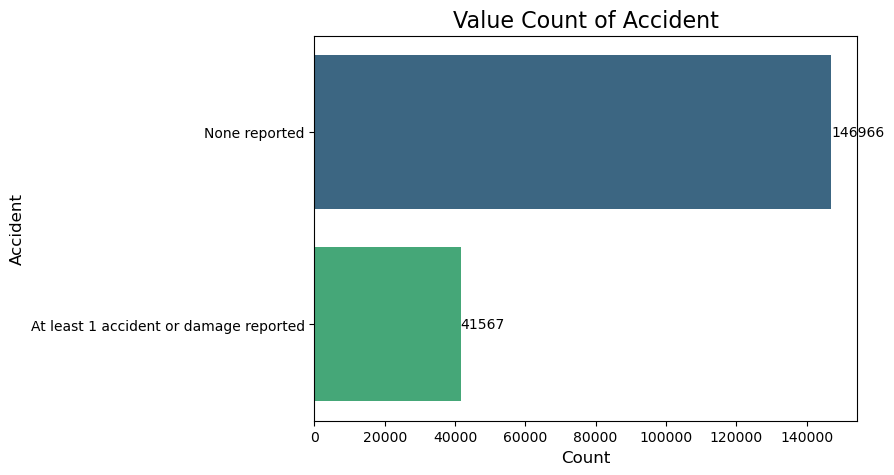

In [15]:
plt.figure(figsize=(7, 5))

# Create horizontal bar chart
sns.barplot(x=df_train['accident'].value_counts().values, 
            y=df_train['accident'].value_counts().index, 
            palette="viridis")

# Add labels for each bar
for index, value in enumerate(df_train['accident'].value_counts().values):
    plt.text(value, index, f'{value}', va='center', fontsize=10)

# Titles and labels
plt.title('Value Count of Accident', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Accident', fontsize=12)

# Show the plot
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_21736\3304805710.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_train['fuel_type'].value_counts().values,


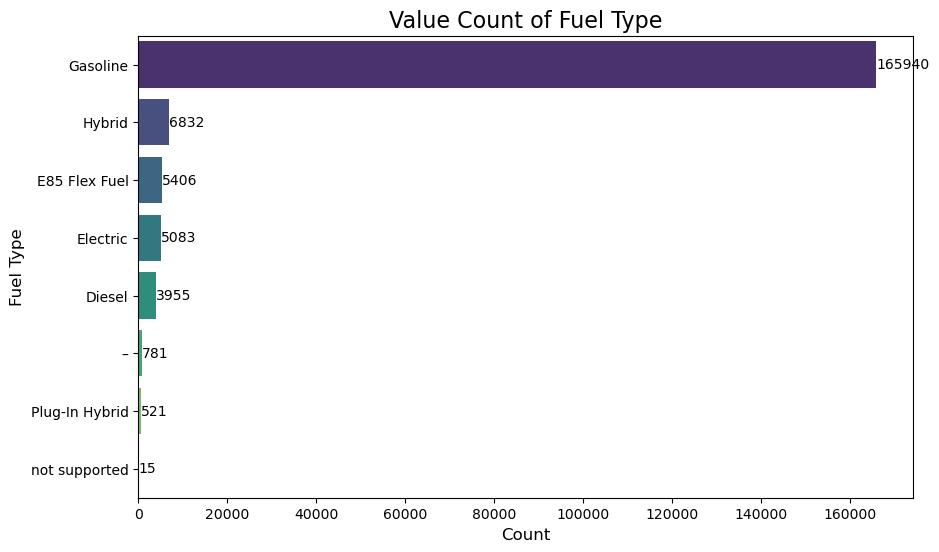

In [17]:
plt.figure(figsize=(10, 6))

# Create horizontal bar chart
sns.barplot(x=df_train['fuel_type'].value_counts().values, 
            y=df_train['fuel_type'].value_counts().index, 
            palette="viridis")

# Add labels for each bar
for index, value in enumerate(df_train['fuel_type'].value_counts().values):
    plt.text(value, index, f'{value}', va='center', fontsize=10)

# Titles and labels
plt.title('Value Count of Fuel Type', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Fuel Type', fontsize=12)

# Show the plot
plt.show()

In [18]:
# One-Hot Encoding
df_train = pd.get_dummies(df_train, columns=['model', 'brand', 'accident', 'int_col', 'ext_col', 'transmission', 'engine', 'fuel_type','clean_title'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['model', 'brand', 'accident', 'int_col', 'ext_col', 'transmission', 'engine', 'fuel_type','clean_title'], drop_first=True)

In [24]:
df_train[df_train.select_dtypes(include='bool').columns] = df_train.select_dtypes(include='bool').astype(int)
df_test[df_test.select_dtypes(include='bool').columns] = df_test.select_dtypes(include='bool').astype(int)

In [32]:
df_train.drop(columns=['id'], inplace=True)
df_test_ids = df_test['id']  
df_test.drop(columns=['id'], inplace=True)

In [36]:
# Rescaling the relevant numerical features in both training and test sets
scaler = MinMaxScaler()
num_vars_train = ['model_year', 'milage']
num_vars_test = ['model_year', 'milage']
df_train[num_vars_train] = scaler.fit_transform(df_train[num_vars_train])
df_test[num_vars_test] = scaler.transform(df_test[num_vars_test])

In [38]:
# Prepare the training and validation data
X_train = df_train.drop('price', axis=1)  # Features
y_train = df_train['price']  # Target

In [39]:
# Align the test data columns with training data
df_test = df_test.reindex(columns=X_train.columns, fill_value=0)

In [40]:
#split the training data into train and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [288]:
# XGBoost model
model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train_split, y_train_split)

# Step 10: Make predictions on the validation set and calculate RMSE
y_val_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f'XGBoost RMSE: {rmse}')

XGBoost RMSE: 72156.03184094866


In [289]:
#LGB (Light Gradient Boosting)
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor(objective='regression', random_state=42)
lgb_model.fit(X_train_split, y_train_split)

# Step 7: Make predictions on the validation set and calculate RMSE
y_val_pred_lgb = lgb_model.predict(X_val)
rmse_lgb = np.sqrt(mean_squared_error(y_val, y_val_pred_lgb))
print(f'LightGBM RMSE: {rmse_lgb}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.577695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5353
[LightGBM] [Info] Number of data points in the train set: 150826, number of used features: 2534
[LightGBM] [Info] Start training from score 43890.785316
LightGBM RMSE: 68349.74728784885


In [290]:
#GBM(Gradient Boosting)
from sklearn.ensemble import GradientBoostingRegressor
gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X_train_split, y_train_split)

# Step 10: Make predictions on the validation set and calculate RMSE
y_val_pred_gbm = gbm_model.predict(X_val)
rmse_gbm = np.sqrt(mean_squared_error(y_val, y_val_pred_gbm))
print(f'Gradient Boosting RMSE: {rmse_gbm}')

Gradient Boosting RMSE: 70088.40881904737


In [291]:
# CatBoost
from catboost import CatBoostRegressor
# Train the CatBoost model
catboost_model = CatBoostRegressor(verbose=0, random_state=42)
catboost_model.fit(X_train_split, y_train_split)

# Predict on validation set and calculate RMSE
y_val_pred_catboost = catboost_model.predict(X_val)
rmse_catboost = np.sqrt(mean_squared_error(y_val, y_val_pred_catboost))
print(f'CatBoost RMSE: {rmse_catboost}')

CatBoost RMSE: 73035.50605893973


In [42]:
# Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer with 64 neurons
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
model.add(Dense(1, activation='linear'))  # Output layer for regression

#  Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#  Train the model
model.fit(X_train_split, y_train_split, epochs=25, batch_size=32, validation_data=(X_val, y_val))

# Make predictions on the validation set and calculate RMSE
y_val_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f'Neural Network RMSE: {rmse}')

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 7407341568.0000 - val_loss: 5142784000.0000
Epoch 2/25
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 5575226880.0000 - val_loss: 4903741952.0000
Epoch 3/25
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 4677344256.0000 - val_loss: 4795799040.0000
Epoch 4/25
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 4891026944.0000 - val_loss: 4734375936.0000
Epoch 5/25
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 5210099200.0000 - val_loss: 4702045184.0000
Epoch 6/25
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 5573581824.0000 - val_loss: 4683970560.0000
Epoch 7/25
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 5482263552.0000 - val_loss: 4671220224.0000
Epoch 8/25
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 5687909888.0000 - val_loss: 4662439424.0000
Epoch 9/25
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 5206569472.0000 - val_loss: 4656989184.0000
Epoch 10/25
4714/4714 ━━━━━━━━━━━━━━━

In [51]:
# Make predictions on the test set
y_test_pred = lgb_model.predict(df_test)

# Step 12: Create a data frame for the predictions and export to CSV
predictions = pd.DataFrame({'id': df_test_ids, 'Predicted': y_test_pred.flatten()})
predictions.to_excel('test_predictions.xlsx', index=False)

3928/3928 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


In [ ]:
Id Price